# CNN

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import requests
requests.packages.urllib3.disable_warnings()
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
# Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [5]:
# Load the dataset
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()
x_train.shape

170500096/170498071 [==============================] - 99s 1us/step


(50000, 32, 32, 3)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
y_train= y_train.reshape(-1,)
y_train[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

In [24]:
y_train.shape

(50000,)

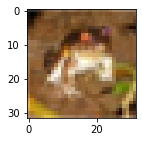

In [13]:
plt.figure(figsize=(12,2))
plt.imshow(x_train[0])

In [14]:
y_train[0]

6

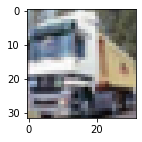

In [15]:
plt.figure(figsize=(12,2))
plt.imshow(x_train[1])

In [16]:
y_train[1]

9

In [17]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [18]:
#Normalize the training data
x_train = x_train/255
x_test= x_test/255

In [ ]:
# Build a simple neural network for image classification

In [23]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid'),
])

ann.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

ann.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 132s 81ms/step - loss: 2.2102 - accuracy: 0.2716
Epoch 2/10
1563/1563 [==============================] - 104s 66ms/step - loss: 1.6816 - accuracy: 0.3961
Epoch 3/10
1563/1563 [==============================] - 100s 64ms/step - loss: 1.5881 - accuracy: 0.4294
Epoch 4/10
1563/1563 [==============================] - 102s 65ms/step - loss: 1.5337 - accuracy: 0.4500
Epoch 5/10
1563/1563 [==============================] - 104s 67ms/step - loss: 1.4919 - accuracy: 0.4659
Epoch 6/10
1563/1563 [==============================] - 114s 73ms/step - loss: 1.4477 - accuracy: 0.4818
Epoch 7/10
1563/1563 [==============================] - 116s 75ms/step - loss: 1.4323 - accuracy: 0.4871
Epoch 8/10
1563/1563 [==============================] - 113s 72ms/step - loss: 1.4025 - accuracy: 0.4989
Epoch 9/10
1563/1563 [==============================] - 113s 72ms/step - loss: 1.3615 - accuracy: 0.5092
Epoch 10/10
1563/1563 [==============================] 

In [26]:
#Build CNN to train our images

cnn=models.Sequential([
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
     layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    
    
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(10,activation='softmax'),
])


In [29]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [30]:
cnn.fit(x_train,y_train,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 75s 43ms/step - loss: 1.8203 - accuracy: 0.3237
Epoch 2/20
1563/1563 [==============================] - 56s 36ms/step - loss: 1.2622 - accuracy: 0.5488
Epoch 3/20
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1098 - accuracy: 0.6073
Epoch 4/20
1563/1563 [==============================] - 73s 47ms/step - loss: 1.0449 - accuracy: 0.6362
Epoch 5/20
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9779 - accuracy: 0.6577
Epoch 6/20
1563/1563 [==============================] - 56s 36ms/step - loss: 0.9390 - accuracy: 0.6707
Epoch 7/20
1563/1563 [==============================] - 57s 37ms/step - loss: 0.8949 - accuracy: 0.6861
Epoch 8/20
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8724 - accuracy: 0.6930
Epoch 9/20
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8431 - accuracy: 0.7048
Epoch 10/20
1563/1563 [==============================] - 60s 38m

In [38]:
#Build CNN to train our images

cnn=models.Sequential([
    layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',strides=(1,1),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
      layers.Dropout((0.25)),
     layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',strides=(1,1),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Dropout((0.25)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(10,activation='softmax'),
])


In [39]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [40]:
cnn.fit(x_train,y_train,epochs=15)

Epoch 1/15
1563/1563 [==============================] - 90s 55ms/step - loss: 1.7985 - accuracy: 0.33860s -
Epoch 2/15
1563/1563 [==============================] - 78s 50ms/step - loss: 1.2770 - accuracy: 0.5419
Epoch 3/15
1563/1563 [==============================] - 79s 50ms/step - loss: 1.1246 - accuracy: 0.59890s - loss: 1.1246 - accuracy: 0.
Epoch 4/15
1563/1563 [==============================] - 84s 54ms/step - loss: 1.0217 - accuracy: 0.6368
Epoch 5/15
1563/1563 [==============================] - 83s 53ms/step - loss: 0.9670 - accuracy: 0.6569
Epoch 6/15
1563/1563 [==============================] - 87s 56ms/step - loss: 0.9372 - accuracy: 0.6686
Epoch 7/15
1563/1563 [==============================] - 83s 53ms/step - loss: 0.8784 - accuracy: 0.6878
Epoch 8/15
1563/1563 [==============================] - 80s 51ms/step - loss: 0.8642 - accuracy: 0.6963
Epoch 9/15
1563/1563 [==============================] - 86s 55ms/step - loss: 0.8354 - accuracy: 0.7042
Epoch 10/15
1563/1563 [=====

In [41]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [42]:
y_test = y_test.reshape(-1,)

In [43]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [44]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 7s 11ms/step - loss: 0.8218 - accuracy: 0.7119


[0.82175612449646, 0.711899995803833]

In [45]:
y_pred = cnn.predict(x_test)

In [46]:
y_pred[:5]

array([[8.32903199e-03, 1.38874922e-03, 1.37926517e-02, 2.77176708e-01,
        1.03830500e-03, 6.25203669e-01, 2.90726721e-02, 6.08840433e-04,
        4.07108963e-02, 2.67843553e-03],
       [3.42022366e-04, 4.33329761e-01, 1.33233762e-05, 1.73850708e-06,
        1.39874921e-08, 1.54856153e-07, 1.79717517e-07, 4.09781293e-08,
        5.65618277e-01, 6.94575720e-04],
       [2.27757171e-01, 1.24465965e-01, 1.96498074e-02, 1.16496943e-02,
        2.95459549e-03, 2.46740016e-03, 2.19110772e-03, 1.01223227e-03,
        5.57495534e-01, 5.03565073e-02],
       [8.35672021e-01, 3.95739125e-03, 3.87863219e-02, 7.34413974e-04,
        3.04828817e-03, 2.38706867e-04, 1.78796751e-03, 5.39942819e-04,
        1.12929367e-01, 2.30558240e-03],
       [5.56678351e-05, 5.57076637e-05, 1.66523941e-02, 1.68221463e-02,
        1.06349764e-02, 1.49884692e-03, 9.54195023e-01, 1.14900622e-05,
        6.47859779e-05, 8.88302475e-06]], dtype=float32)

In [47]:
y_label=[np.argmax(i) for i in y_pred]

In [48]:
y_label[:5]

[5, 8, 8, 0, 6]

In [49]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [52]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_label))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74      1000
           1       0.86      0.85      0.86      1000
           2       0.58      0.59      0.59      1000
           3       0.56      0.42      0.48      1000
           4       0.62      0.66      0.64      1000
           5       0.56      0.68      0.62      1000
           6       0.71      0.84      0.77      1000
           7       0.83      0.72      0.77      1000
           8       0.83      0.83      0.83      1000
           9       0.81      0.83      0.82      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



In [ ]:
#### dropout layer == it randomly drops some neurons------- used to avoid overfitting

### Imagedatagenerator from keras--- rotate, rescale, zoom in 

#### callbacks and learning rate------- earlystopping